In [1]:
#Adapted from the Keras Example https://keras.io/examples/structured_data/collaborative_filtering_movielens/

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt



## Loading in the Dataset

First we load in the small version of the dataset. As this is a **Collaborative Filtering** approach, we are interested in the **ratings.csv**, which has all over ratings made by each user.

In [3]:
df = pd.read_csv("C:/Users/86158/Desktop/semester 3/Personalisation-22-23-main/data/ml-latest-small/ratings.csv")  #C:\Users\86158\Desktop\semester 3\Personalisation-22-23-main\data\ml-latest-small

In [4]:
len(df)

100004

In [5]:
df.tail(100)

,userId,movieId,rating,timestamp
99904,671,590,4.0,1065149296
99905,671,608,4.0,1064890575
99906,671,745,4.0,1065149085
99907,671,919,4.0,1065149458
99908,671,1035,5.0,1065149492
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


## Preprocessing 
A list of userId and movieId pairs loaded into a Pandas DataFrame.

an embedding layer as a one-hot encoding layer the size of your vocabulary, followed by a fully connected layer the size of your embedding.

When we make the embedding, we will need a way of mapping back from indexes in the one-hot encoding back to the ids for the users and movies.

### Vocabulary 

In order to make the vocabulary (all the unique ids), we can use the ``unique()`` function in ``Pandas``

In [6]:
user_ids = df["userId"].unique().tolist()
movie_ids = df["movieId"].unique().tolist()

In [7]:
len(movie_ids)

9066

In [8]:
print(movie_ids)

[31, 1029, 1061, 1129, 1172, 1263, 1287, 1293, 1339, 1343, 1371, 1405, 1953, 2105, 2150, 2193, 2294, 2455, 2968, 3671, 10, 17, 39, 47, 50, 52, 62, 110, 144, 150, 153, 161, 165, 168, 185, 186, 208, 222, 223, 225, 235, 248, 253, 261, 265, 266, 272, 273, 292, 296, 300, 314, 317, 319, 339, 349, 350, 356, 357, 364, 367, 370, 371, 372, 377, 382, 405, 410, 454, 457, 468, 474, 480, 485, 497, 500, 508, 509, 515, 527, 537, 539, 550, 551, 552, 585, 586, 587, 588, 589, 590, 592, 593, 616, 661, 720, 60, 247, 267, 318, 355, 595, 736, 778, 866, 1197, 1210, 1235, 1271, 1378, 1580, 1721, 1884, 2028, 2318, 2513, 2694, 2702, 2716, 2762, 2841, 2858, 2959, 3243, 3510, 3949, 5349, 5669, 6377, 7153, 7361, 8622, 8636, 27369, 44191, 48783, 50068, 58559, 84236, 34, 112, 141, 173, 260, 289, 329, 380, 431, 434, 435, 440, 442, 464, 541, 594, 596, 610, 858, 903, 910, 913, 919, 1011, 1016, 1022, 1028, 1030, 1031, 1032, 1033, 1036, 1073, 1079, 1089, 1097, 1125, 1127, 1136, 1194, 1196, 1198, 1200, 1206, 1208, 1213, 12

In [9]:
#Make a dictionary mapping ids (keys) to indexes (values)
user_id_to_index = {x: i for i, x in enumerate(user_ids)}
movie_id_to_index = {x: i for i, x in enumerate(movie_ids)}

In [10]:
#Make a new column in the dataframe which contains the appropriate index for each user and movie
df["user_index"] = [user_id_to_index[i] for i in df["userId"]]
df["movie_index"] = [movie_id_to_index[i] for i in df["movieId"]]

In [11]:
df.head(25)

,userId,movieId,rating,timestamp,user_index,movie_index
0,1,31,2.5,1260759144,0,0
1,1,1029,3.0,1260759179,0,1
2,1,1061,3.0,1260759182,0,2
3,1,1129,2.0,1260759185,0,3
4,1,1172,4.0,1260759205,0,4
5,1,1263,2.0,1260759151,0,5
6,1,1287,2.0,1260759187,0,6
7,1,1293,2.0,1260759148,0,7
8,1,1339,3.5,1260759125,0,8
9,1,1343,2.0,1260759131,0,9


# Scaling the ratings

As is good when working with ``gradient descent``, it helps to have our values on a similar range, and for that to be between 0 and 1. We can use the ``MinMaxScaler`` from ``Scikit-Learn`` to scale our ratings to between 0 and 1

In [12]:
df["rating"].describe()

count    100004.000000
mean          3.543608
std           1.058064
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [13]:
from sklearn.preprocessing import MinMaxScaler
##Pick the range\
df["rating"] = MinMaxScaler().fit_transform(df["rating"].values.reshape(-1, 1))

In [14]:
df["rating"].describe()

count    100004.000000
mean          0.676357
std           0.235125
min           0.000000
25%           0.555556
50%           0.777778
75%           0.777778
max           1.000000
Name: rating, dtype: float64

## Training Set

We are making a **predictive model** that will take a **user** and **movie** and return a **rating**. 

For our training, we will make a dataset using the information we already know. In this context, our input feautres (``x``) are the movie and user indexes, and the our output (``y``) is the rating. 

We make a train - test split of ``10%`` to validate our model. 

In [15]:
from sklearn.model_selection import train_test_split
#Inputs
x = df[["user_index", "movie_index"]]
#Outputs
y = df["rating"]
#Get train-test split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state=42)

In [16]:
#import library
import torch

# 重点 Predicted Rating = Dot Product(user_vector, item_vector) + user_bias + item_bias

## The Dot Product Recommender Model

Lets remember the model we're trying to make. 


```
Predicted Rating = Dot Product(user_vector, item_vector) + user_bias + item_bias
```


Our target is to find a vector for each movie and user so that their dot product (+ their biases) is an accurate prediction for the rating that user would make for that movie. 

Each of these vectors will be contained in a matrix, that we call an **embedding**


### The Embedding Layer 

Again, you can think of an embedding layer as a **one-hot encoding** layer the size of your **vocabulary**, followed by a **fully connected layer** the size of your embedding. 

Luckily, ```PyTorch``` has a layer already we can use, all we have to say is 

1. How many items we have (vocabulary size)

2. The size of the embedding 

You might use something between 10-300, and this is something you will have to tune

### New Arguments for ``__init__``

Again, we will override the ```__init__()``` function, but this time we will add in some extra arguments. We can use this to pass in 

1. Number of users 

2. Number of movies

3. Size of Embedding

These get passed in when we make the new object 

```
model = RecommenderNet(num_users, num_movies, EMBEDDING_SIZE)

```

### Saving Variables and ```self```

Finally, the last **Object-oriented** concept we'll need allows us to save things within the object. These are sometimes called ``instance variables`` or ``fields``, but the main thing you need to know is **these are like the variables we use all the time to store objects and data**, apart from they belong to the object, and only work within this context 

We use the keyword ```self``` within the object to refer to itself. We can use this to make layers in the ```__init__()``` function, store them in the object, and then reuse and update them in the ```forward()``` function.


On every forwards pass (see ``forward()`` below)

1. We take a batch of ``users`` and ``movies``


2. Run them through the normal embedding and bias embedding layers respectively 


3. Get the vectors for each out 


4. Get the dot product of the user and movie vectors 


5. Add the biases 


6. Run through a sigmoid


7. Return!

In [17]:
class RecommenderNet(torch.nn.Module):
    def __init__(self, num_users, num_movies, embedding_size=20):
        super().__init__()    #initialize
        self.user_embedding = torch.nn.Embedding(num_users, embedding_size) # Embed element num_users
        self.user_bias = torch.nn.Embedding(num_users, 1)  # embedding_size)
        self.movie_embedding = torch.nn.Embedding(num_movies, embedding_size)
        self.movie_bias = torch.nn.Embedding(num_movies, 1)
        self.sig = torch.nn.Sigmoid() 

    def forward(self, inputs):
        #Split out indexes  
        user_indexes = inputs[:, 0]
        movie_indexes = inputs[:, 1]
        #Forward pass on embedding layer 
        user_vector = self.user_embedding(user_indexes) 
        user_bias = self.user_bias(user_indexes).flatten()
        movie_vector = self.movie_embedding(movie_indexes)
        movie_bias = self.movie_bias(movie_indexes).flatten()
        #Dot product
        dot = (user_vector * movie_vector).sum(1)
        with_bias = dot + user_bias + movie_bias
        #Activation function
        output = self.sig(with_bias)
        return output



### Set up model

In [19]:
#Pick Embedding size
EMBEDDING_SIZE = 16
#Make new object (calls __init__())
num_users = len(user_ids)
num_movies = len(movie_ids)
model = RecommenderNet(num_users, num_movies, EMBEDDING_SIZE)

### Training and Datasets in PyTorch

PyTorch requires a little bit of manual set up for the training loop that we got for free in ``Keras`` with the ``fit()`` function. 

Below we see two for loops, one that loops round every epoch (once through the entire dataset) and inside that that loops through each batch (a subset of a chosen size).

``PyTorch`` gives us a ``DataLoader`` object which helps with the batching process.

Within that inner loop we pass in part of the training set, calculate the loss and update the weights based on this. 


In [20]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

class MoviesDataset(Dataset): 
    def __init__(self, X,y):
        self.X = torch.IntTensor(X)
        self.y = torch.FloatTensor(y)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
    
   

In [21]:
#Use our train - validation split to make DataLoader objects
train_dl = DataLoader(MoviesDataset(x_train.values,y_train.values), batch_size=64, shuffle=True)
validation_dl = DataLoader(MoviesDataset(x_val.values,y_val.values), batch_size=64, shuffle=True)

In [22]:
epochs = 10
#Use Mean Squared Error as a loss function
loss_fn = torch.nn.MSELoss() 
#Use the Adam algorithm to update the weights based on the loss
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [23]:
#Use a for loop to repeat for the desired number of epochs 
for i in range(epochs):
    
    model.train(True)
    
    #Use a for loop for each batch (provided by the Dataloader)
    running_loss = 0.0
    for (index, batch) in enumerate(train_dl):
        
        #Get batch 
        inputs, labels = batch
        model.zero_grad()
        
        #Forward pass
        prediction = model(inputs)
        
        #Get Loss
        loss = loss_fn(prediction, labels)
        
        #Update weights (back prop)
        loss.backward()
        optimizer.step()
        running_loss += loss
    
    avg_loss = running_loss / (index + 1)

    model.train(False)

    #Now try with the validation set (no need to update weights, just get loss)
    running_vloss = 0.0
    for index, vdata in enumerate(validation_dl):
        vinputs, vlabels = vdata
        voutputs = model(vinputs)
        vloss = loss_fn(voutputs, vlabels)
        running_vloss += vloss

    avg_vloss = running_vloss / (index + 1)
    print('Loss {} Validation Loss {}'.format(avg_loss, avg_vloss))

Loss 0.1750703603029251 Validation Loss 0.12003464996814728
Loss 0.078511081635952 Validation Loss 0.08712414652109146
Loss 0.04915506765246391 Validation Loss 0.07325321435928345
Loss 0.03734564408659935 Validation Loss 0.0670546367764473
Loss 0.031535804271698 Validation Loss 0.06623506546020508
Loss 0.027926793321967125 Validation Loss 0.06447163224220276
Loss 0.025508688762784004 Validation Loss 0.06481712311506271
Loss 0.02382367104291916 Validation Loss 0.06481997668743134
Loss 0.022606132552027702 Validation Loss 0.0656891018152237
Loss 0.021785156801342964 Validation Loss 0.06368888914585114


### Save and Reload models

We can save the weights of our model (the important parts that we have learned) to file so we don't have to train again in future

We can then load them into a new model from file. 

In [24]:
torch.save(model.state_dict(), 'model_weights.pth')

然后，通过调用torch.load()函数加载了预训练的模型参数。模型参数保存在名为'model_weights.pth'的文件中，load_state_dict()方法将这些参数加载到model实例中，使其具有预训练的权重。

最后，通过调用model.eval()方法将模型设置为评估模式。在评估模式下，模型的行为可能会略有不同，例如在前向传播时可能不会应用一些正则化技术或随机性操作，而是以确定性的方式进行预测。

In [25]:
model = RecommenderNet(num_users, num_movies, EMBEDDING_SIZE)
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

RecommenderNet(
  (user_embedding): Embedding(671, 16)
  (user_bias): Embedding(671, 1)
  (movie_embedding): Embedding(9066, 16)
  (movie_bias): Embedding(9066, 1)
  (sig): Sigmoid()
)

### Accessing the Embeddings 

We can access the **embedding layers** in our model object. This is the embedding and we can see is has a shape of ```num_users x EMBEDDING_SIZE```

In [26]:
num_users, EMBEDDING_SIZE, model.user_embedding

(671, 16, Embedding(671, 16))

### Making Predictions 

Now, we can use our trained model to make predictions, and with the predicted ratings, we can pick some recommendations!

In order to get the ratings for all movies for a given user, we need to get pass in our data in the form 

```
[
    [user_index, movie_1_index],
    [user_index, movie_2_index],
    [user_index, movie_3_index],
    .....
]

```

In [27]:

movie_data = pd.read_csv("C:/Users/86158/Desktop/semester 3/Personalisation-22-23-main/data/ml-latest-small/movies.csv")
movie_data.columns

Index(['movieId', 'title', 'genres'], dtype='object')

### Making predictions and `argsort()`

Once we have the predicted ratings for each film, we need to get the **Top N**

Here we use `np.argsort()`, which does the sort based on the **ratings** but returns the **indexes** rather than the **ratings themselves**. We can then use this to look up the `movie_ids` and then the `title`.

In [28]:
def get_top_n(user, n=10): 
    #Get Movie Names
    top_n_indexes = get_top_n_indexes(user, n)
    top_n = get_names_for_indexes(top_n_indexes)
    return top_n

def get_names_for_indexes(indexes):
    return [movie_data[movie_data["movieId"]==movie_ids[i]]["title"].item() for i in indexes]

def get_top_n_indexes(user, n = 10):
    #For one user, make a pair with every movie index
    x = torch.IntTensor([[user, i] for i in np.arange(num_movies)])
    #Predict 
    predicted_ratings = model(x)
    #Get Top-N indexes
    top_n_indexes = predicted_ratings.argsort()[-n:]
    return top_n_indexes

In [29]:
#Random users top 10
get_top_n(np.random.randint(10))

['Cook the Thief His Wife & Her Lover, The (1989)',
 'Stake Land (2010)',
 'Leprechaun (1993)',
 'Domino (2005)',
 'Secret, The (2006)',
 'Woman in the Window, The (1944)',
 'Dr. Mabuse: The Gambler (Dr. Mabuse, der Spieler) (1922)',
 'Lawless (2012)',
 'Ernest Scared Stupid (1991)',
 'Richard III (1995)']

In [30]:
get_top_n(0)

["'night Mother (1986)",
 'My Girl 2 (1994)',
 'Chinoise, La (1967)',
 'Sammy and Rosie Get Laid (1987)',
 'Town & Country (2001)',
 'Curse of the Jade Scorpion, The (2001)',
 'Children of Paradise (Les enfants du paradis) (1945)',
 'Elektra Luxx (2010)',
 'Fawlty Towers (1975-1979)',
 'Power of Nightmares, The: The Rise of the Politics of Fear (2004)']

# Assignment 2

Please remember to comment your code clearly, submit ``.ipynb`` 

## Task 1

We're going to ask you take the trained model and write the code to make two metrics - **Diversity** and **Novelty**. You should end up with **one statistic** for each that tells you something about the recommendations of the trained model based on the **whole dataset**.


#### Pro Tip

This will take quite a long time to run on the whole dataset, so start off by trying to get the code to work for **one user**, then expand to **two users**, then **every user**.

### Diversity 

This tells us what the mean diversity (inverse of the similarity, based on movie embeddings) between each film in every users Top 10 films is. 

1. Calculate every user's top 10


2. For each top 10, get the embedding for each film then use this to calculate the similarity matrix


3. Invert similarity to get the difference


4. Get mean difference for each top 10 


5. Report the mean for whole dataset (every top 10)




In [36]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def diversity(user, n=10):
    # Calculate every user's top 10
    top_n_indexes = get_top_n_indexes(user, n)

    # For each top 10, get the embedding for each film then use this to calculate the similarity matrix
    embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()

    # Compute the similarity matrix
    similarity_matrix = cosine_similarity(embeddings)

    # Invert similarity to get the difference
    diversity = 1 - similarity_matrix
    
    # Get mean difference for each top 10
    mean_diversity = np.mean(diversity)

    return mean_diversity


In [40]:
# Compute the diversity for each user
diversities = [diversity(user) for user in range(num_users)]
print(diversities)


C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tenso

C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tenso

C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tenso

C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tenso

C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tenso

C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tenso

C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tenso

C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tenso

C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tenso

C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tenso

C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tenso

C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tenso

C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tenso

C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tenso

C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tenso

C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tenso

C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tenso

[0.5931239, 0.6216045, 0.5891719, 0.5738561, 0.56538606, 0.5798974, 0.5778276, 0.635664, 0.5897581, 0.65690565, 0.5250489, 0.552624, 0.6247327, 0.605624, 0.65394104, 0.5045446, 0.76055074, 0.64374083, 0.7152416, 0.5562381, 0.68363875, 0.61900043, 0.7665795, 0.56989825, 0.5573562, 0.56450105, 0.5774123, 0.5176212, 0.47658643, 0.72866327, 0.63914657, 0.632309, 0.6068055, 0.63071233, 0.47236064, 0.5770765, 0.59509027, 0.6267693, 0.51847345, 0.6027948, 0.7799855, 0.6397724, 0.68513405, 0.60608065, 0.5417098, 0.55938166, 0.5431354, 0.8604151, 0.56843734, 0.66344696, 0.5799992, 0.5766608, 0.59598154, 0.5716858, 0.63210917, 0.57397664, 0.673184, 0.58721614, 0.59698695, 0.555599, 0.592847, 0.6239634, 0.59161144, 0.41680786, 0.50175244, 0.6219455, 0.60969424, 0.6337139, 0.63418823, 0.604798, 0.59649646, 0.74737066, 0.7665993, 0.5315231, 0.57481927, 0.6114902, 0.7592916, 0.60221887, 0.60824585, 0.58134866, 0.60833657, 0.6200317, 0.56753266, 0.7836663, 0.5682677, 0.4507242, 0.66694456, 0.5784786,

C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tensor(top_n_indexes)).detach().numpy()
C:\Users\86158\AppData\Local\Temp\ipykernel_4992\2900608899.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = model.movie_embedding(torch.tenso

In [41]:
# Report the mean diversity for the whole dataset
mean_diversity = np.mean(diversities)
print("Mean Diversity: ", mean_diversity)

Mean Diversity:  0.6026617


# Novelty 

This tells us what the mean popularity (e.g. mean rating) of the films in every users Top 10 films is 

1. Calculate every user's top 10


2. For each top 10, get the mean rating for each film (based on the original **MovieLens Small** dataset (``df = pd.read_csv("ml-latest-small/ratings.csv")``). 


3. Get the mean rating for each top 10.


4. Report the mean for the whole dataset (every top 10).



In [42]:
def novelty(user, n=10):
    # Calculate every user's top 10
    top_n_indexes = get_top_n_indexes(user, n)

    # Get the original movie IDs for the top n movies
    top_n_movie_ids = [movie_ids[i] for i in top_n_indexes]

    # For each top 10, get the mean rating for each film
    mean_ratings = [df[df['movieId'] == movie_id]['rating'].mean() for movie_id in top_n_movie_ids]

    # Compute the mean of the mean ratings
    mean_novelty = np.mean(mean_ratings)

    return mean_novelty

# Get the mean rating for each top 10.
novelties = [novelty(user) for user in range(num_users)]
print("Novelties: ", novelties)
# Report the mean for the whole dataset (every top 10).
mean_novelty = np.mean(novelties)
print("Mean Novelty: ", mean_novelty)

Novelties:  [0.7037037037037036, 0.7388888888888888, 0.7866666666666667, 0.6348148148148147, 0.5940503432494278, 0.569927536231884, 0.8833333333333332, 0.8486111111111111, 0.77010582010582, 0.8333333333333334, 0.8185185185185183, 0.6777777777777777, 0.8657608695652174, 0.7087301587301587, 0.9777777777777779, 0.8269841269841269, 0.8444444444444443, 0.9407407407407407, 0.9222222222222222, 0.7283475783475784, 0.908974358974359, 0.6801587301587302, 0.8171497584541061, 0.7833333333333334, 0.8080515297906603, 0.7298148148148148, 0.6671497584541063, 0.6312678062678062, 0.7638888888888887, 0.794927536231884, 0.8209876543209876, 0.85, 0.7834188034188033, 0.9888888888888889, 0.728114478114478, 0.837037037037037, 0.8055555555555556, 0.8060386473429952, 0.6747008547008546, 0.5710144927536231, 0.8722222222222221, 0.7144444444444444, 0.904830917874396, 0.6334259259259258, 0.8849206349206348, 0.6075224292615597, 0.5966931216931217, 0.9060386473429952, 0.7529790660225443, 0.7752979066022544, 0.8142857

# 
## Task 2

Using a dimensionality reduction approach (PCA? TSNE?), plot the top 30 best rated films on a 2-D graph based on their movie embeddings. Label each point with the title.

There is infact ~400 films that have an average rating of 5 (because some films have only 1 rating). Can you adjust or filter for this?

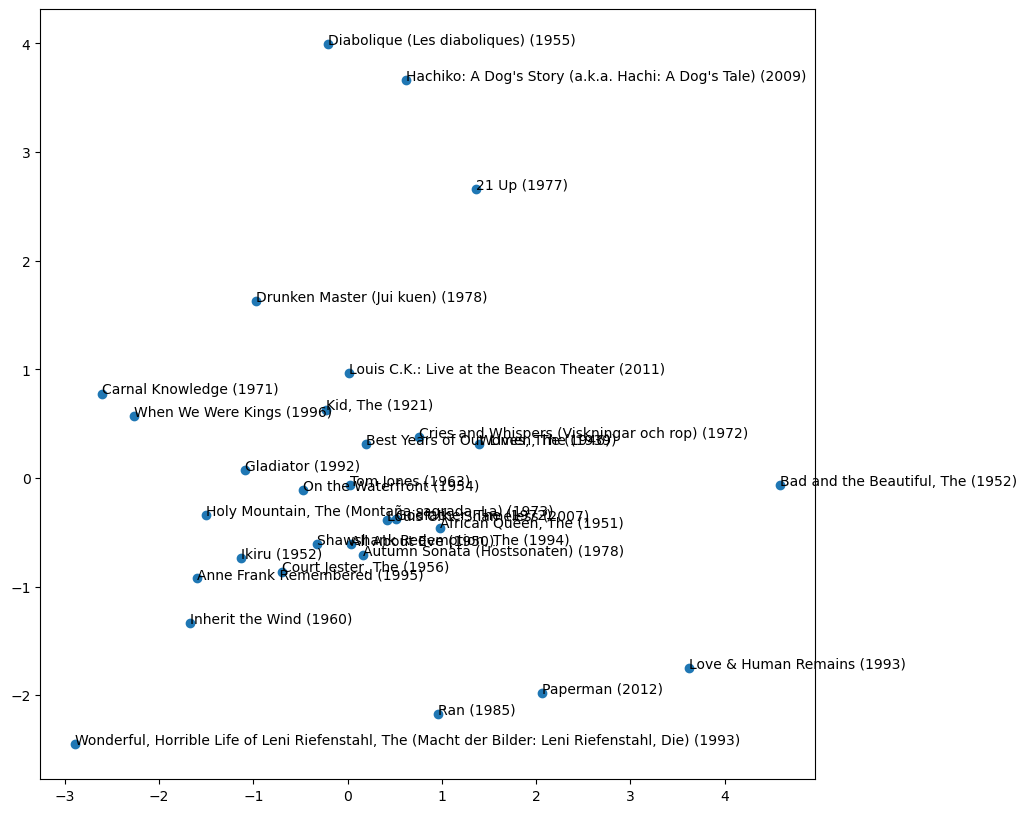

In [47]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Minimum number of ratings for a movie
min_ratings = 5

# Compute mean ratings and count ratings for each movie
mean_ratings = df.groupby('movieId')['rating'].mean()
count_ratings = df.groupby('movieId')['rating'].count()

# Filter movies that have at least 5
filtered_movies = mean_ratings[count_ratings >= min_ratings].sort_values(ascending=False)

# Get the top 30 movies
top_30_movies = filtered_movies.head(30).index.tolist()

# Get the embeddings of the top 30 movies
top_30_embeddings = model.movie_embedding(torch.tensor([movie_ids.index(movie_id) for movie_id in top_30_movies])).detach().numpy()

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
top_30_embeddings_pca = pca.fit_transform(top_30_embeddings)

# Plot 
plt.figure(figsize=(10, 10))
plt.scatter(top_30_embeddings_pca[:, 0], top_30_embeddings_pca[:, 1])

for i, movie_id in enumerate(top_30_movies):
    plt.annotate(movie_data[movie_data["movieId"]==movie_id]["title"].item(),
                 (top_30_embeddings_pca[i, 0], top_30_embeddings_pca[i, 1]))
plt.show()